EN3160 Assignment  2 on Fitting and Assignment 

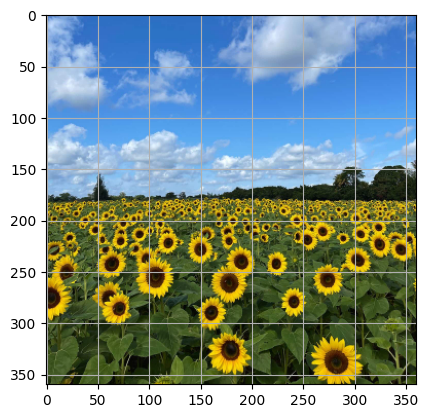

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("Images/the_berry_farms_sunflower_field.jpeg", cv.IMREAD_REDUCED_COLOR_4)
assert img is not None

plt.figure()
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.grid(True)
plt.show()

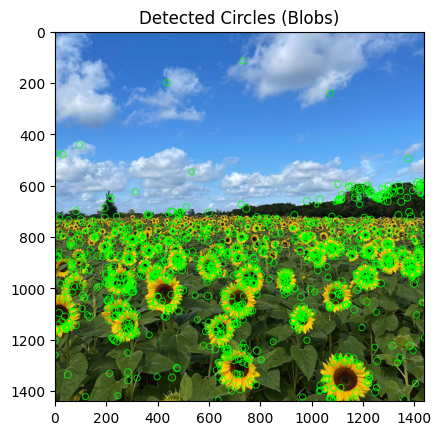

Blob 1: Position = (731, 115), Radius = 12.73
Blob 2: Position = (436, 200), Radius = 12.73
Blob 3: Position = (1072, 242), Radius = 12.73
Blob 4: Position = (95, 444), Radius = 12.73
Blob 5: Position = (0, 476), Radius = 14.14
Blob 6: Position = (30, 480), Radius = 12.73
Blob 7: Position = (1376, 496), Radius = 14.14
Blob 8: Position = (531, 548), Radius = 12.73
Blob 9: Position = (1437, 583), Radius = 12.73
Blob 10: Position = (1410, 588), Radius = 14.14
Blob 11: Position = (1425, 593), Radius = 14.14
Blob 12: Position = (1436, 593), Radius = 11.31
Blob 13: Position = (1099, 596), Radius = 12.73
Blob 14: Position = (1437, 597), Radius = 12.73
Blob 15: Position = (1419, 598), Radius = 12.73
Blob 16: Position = (1339, 599), Radius = 14.14
Blob 17: Position = (1408, 599), Radius = 14.14
Blob 18: Position = (1419, 599), Radius = 14.14
Blob 19: Position = (1153, 602), Radius = 12.73
Blob 20: Position = (1216, 602), Radius = 14.14
Blob 21: Position = (1422, 602), Radius = 14.14
Blob 22: Po

In [6]:
# Load the image
im = cv.imread('images/the_berry_farms_sunflower_field.jpeg')
gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# Define function for Laplacian of Gaussian (LoG) computation
def compute_log(image, sigma):
    """Compute Laplacian of Gaussian (LoG) with given sigma."""
    # Apply Gaussian Blur
    blurred = cv.GaussianBlur(image, (0, 0), sigma)
    # Apply Laplacian
    log_image = cv.Laplacian(blurred, cv.CV_64F)
    return log_image

# Define a range of sigma values for scale space
sigma_values = np.linspace(1, 10, 10)  # Modify range as needed

# Store results for each sigma
log_images = []

for sigma in sigma_values:
    log_images.append(np.square(compute_log(gray, sigma)))

# Stack them into a 3D array (scale space)
log_stack = np.stack(log_images, axis=-1)

# Find scale-space maxima (potential blob centers)
# This can be done by finding local maxima in the 3D log_stack.
max_coords = np.argwhere(log_stack == np.max(log_stack, axis=(0,1)))

# Retrieve the largest circle based on the scale where maximum response is found
largest_blobs = []

for coord in max_coords:
    y, x, sigma_idx = coord
    radius = sigma_values[sigma_idx] * np.sqrt(2)
    largest_blobs.append((x, y, radius))

# Draw circles for the largest detected blobs
for blob in largest_blobs:
    x, y, radius = blob
    cv.circle(im, (x, y), int(radius), (0, 255, 0), 2)

# Display the result
plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.title('Detected Circles (Blobs)')
plt.show()

# Report parameters of the largest circles
for i, blob in enumerate(largest_blobs):
    x, y, radius = blob
    print(f"Blob {i+1}: Position = ({x}, {y}), Radius = {radius:.2f}")

# Range of σ values used
print(f"Range of σ values used: {sigma_values}")


Question 02